In [29]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os

import lightgbm as lgbm

from LGBMSelGB import LGBMSelGB
from utils import compare_model_error, load_data

In [3]:
base_dir = "../datasets/istella-s-letor/sample"
train_file = base_dir + "/train.txt"
valid_file = base_dir + "/vali.txt"
test_file = base_dir + "/test.txt"

In [4]:
train_data, train_labels, train_query_lens = load_data(train_file)
print('Training set loaded')

Training set loaded


In [5]:
valid_data, valid_labels, valid_query_lens = load_data(valid_file)
print('Validation set loaded')

Validation set loaded


In [8]:
test_data, test_labels, test_query_lens = load_data(test_file)
print('Testing set loaded')

Testing set loaded


In [11]:
train_set = lgbm.Dataset(train_data, label=train_labels, group=train_query_lens).construct()
eval_set = [(train_data, train_labels),
            (valid_data, valid_labels),
            (test_data, test_labels)]
eval_group = [train_query_lens, valid_query_lens, test_query_lens]
eval_names = ['train', 'valid', 'test']
valid_sets = []
for i, eval_data in enumerate(eval_set):
    ds = lgbm.Dataset(eval_data[0], eval_data[1], group=eval_group[i], reference=train_set).construct()
    valid_sets.append(ds)

params = {
    'objective': 'lambdarank',
    'max_position': 10,
    'learning_rate': 0.05,
    'num_leaves': 64,
    'metric': ['ndcg'],
    'ndcg_eval_at': 10,
    'verbose': 1,
}
lgbm_base_info = {}

In [13]:
lgbm_base = lgb.train(params, train_set, num_boost_round=250,
                       valid_sets=valid_sets, valid_names=eval_names,
                       verbose_eval=10, evals_result=lgbm_base_info)

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[20]	train's ndcg@10: 0.716904	valid's ndcg@10: 0.693704	test's ndcg@10: 0.694167
[30]	train's ndcg@10: 0.727138	valid's ndcg@10: 0.703243	test's ndcg@10: 0.704513
[40]	train's ndcg@10: 0.734827	valid's ndcg@10: 0.709803	test's ndcg@10: 0.711997
[50]	train's ndcg@10: 0.740223	valid's ndcg@10: 0.715886	test's ndcg@10: 0.716419
[60]	train's ndcg@10: 0.744981	valid's ndcg@10: 0.720335	test's ndcg@10: 0.720611
[70]	train's ndcg@10: 0.748952	valid's ndcg@10: 0.724191	test's ndcg@10: 0.723476
[80]	train's ndcg@10: 0.752586	valid's ndcg@10: 0.727118	test's ndcg@10: 0.726585
[90]	train's ndcg@10: 0.756058	valid's ndcg@10: 0.730427	test's ndcg@10: 0.729646
[100]	train's ndcg@10: 0.759096	valid's ndcg@10: 0.733414	test's ndcg@10: 0.73233
[110]	train's ndcg@10: 0.762128	valid's ndcg@10: 0.735689	test's ndcg@10: 0.734366
[120]	train's ndcg@10: 0.764537	valid's ndcg@10: 0.737573	test's ndcg@10: 0.736095
[130]	train's 

In [14]:
params['boosting'] = 'goss'
lgbm_goss_info = {}
lgbm_goss = lgb.train(params, train_set, num_boost_round=250,
                      valid_sets=valid_sets, valid_names=eval_names,
                      verbose_eval=10, evals_result=lgbm_goss_info)

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[20]	train's ndcg@10: 0.716904	valid's ndcg@10: 0.693704	test's ndcg@10: 0.694167
[30]	train's ndcg@10: 0.727281	valid's ndcg@10: 0.703502	test's ndcg@10: 0.70439
[40]	train's ndcg@10: 0.734471	valid's ndcg@10: 0.709873	test's ndcg@10: 0.711512
[50]	train's ndcg@10: 0.740272	valid's ndcg@10: 0.715385	test's ndcg@10: 0.71624
[60]	train's ndcg@10: 0.744622	valid's ndcg@10: 0.719573	test's ndcg@10: 0.719833
[70]	train's ndcg@10: 0.748868	valid's ndcg@10: 0.723319	test's ndcg@10: 0.72298
[80]	train's ndcg@10: 0.752318	valid's ndcg@10: 0.726792	test's ndcg@10: 0.725587
[90]	train's ndcg@10: 0.755919	valid's ndcg@10: 0.730617	test's ndcg@10: 0.728388
[100]	train's ndcg@10: 0.759016	valid's ndcg@10: 0.732742	test's ndcg@10: 0.731931
[110]	train's ndcg@10: 0.761987	valid's ndcg@10: 0.73555	test's ndcg@10: 0.734232
[120]	train's ndcg@10: 0.764568	valid's ndcg@10: 0.737557	test's ndcg@10: 0.736442
[130]	train's ndc

In [15]:
selgb_base = LGBMSelGB(n_estimators=250, n_iter_sample=10, p=0.1, method='fixed')
selgb_base.fit(train_data, train_labels, train_query_lens, params,
           eval_set=eval_set, eval_group=eval_group, eval_names=eval_names,
           verbose=10)

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.76 min
[20]	train's ndcg@10: 0.728616	valid's ndcg@10: 0.703018	test's ndcg@10: 0.703212
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.82 min
[30]	train's ndcg@10: 0.739771	valid's ndcg@10: 0.713116	test's ndcg@10: 0.713709
[SelGB] [Info] new p: 0.1
SelGB sample execution took 2.00 min
[40]	train's ndcg@10: 0.747248	valid's ndcg@10: 0.719283	test's ndcg@10: 0.719691
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.93 min
[50]	train's ndcg@10: 0.754281	valid's ndcg@10: 0.726036	test's ndcg@10: 0.726511
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.96 min
[60]	train's ndcg@10: 0.759062	valid's ndcg@10: 0.730702	test's ndcg@10: 0.730016
[SelGB] [Info] new p: 0.1
SelGB sample execution took 2.06 min
[70]	train's ndcg@10: 0.763231	valid's ndcg@10: 0.734847	test's ndcg@10: 0.733526
[SelGB] [Info] new p: 0.1
SelGB sample execution

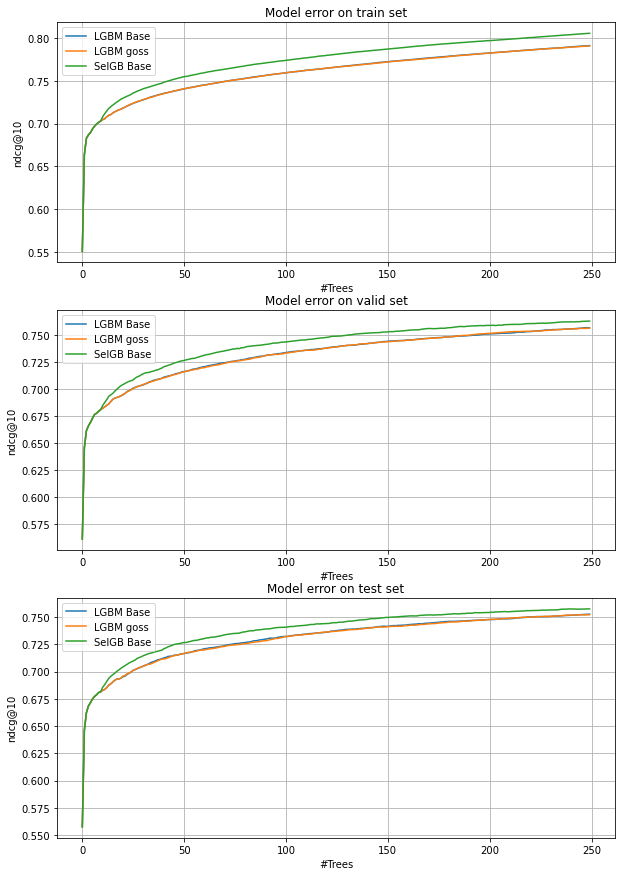

In [33]:
ndcg_150, ndcg_full = compare_model_error([lgbm_base_info, lgbm_goss_info, selgb_base.get_evals_result()],
                                          ['LGBM Base', 'LGBM goss', 'SelGB Base'], plot=True)

In [25]:
lgbm_base.save_model('../output/models/lgbm_base.txt')
lgbm_goss.save_model('../output/models/lgbm_goss.txt')
selgb_base.save_model('../output/models/selgb_base.txt')

In [36]:
ndcg_150.to_csv('../output/results/ndcg150.csv')
ndcg_150

,train,valid,test
LGBM Base,0.772401,0.744088,0.741686
LGBM goss,0.772114,0.743657,0.741378
SelGB Base,0.787179,0.752772,0.749808


In [37]:
ndcg_full.to_csv('../output/results/ndcgfull.csv')
ndcg_full

,train,valid,test
LGBM Base,0.791203,0.756590,0.752780
LGBM goss,0.790786,0.756211,0.752283
SelGB Base,0.805574,0.762734,0.757690
